YOLOV3 Hyavan tanımlama

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

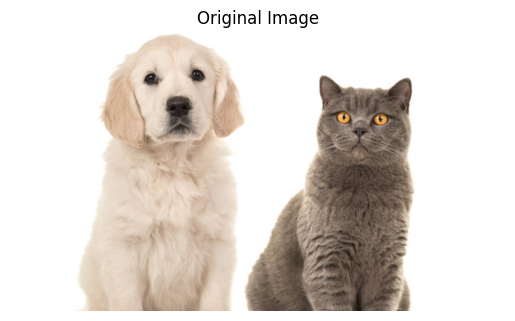

In [4]:
f = os.path.join(os.path.dirname(os.getcwd()), "media","dog_cat.jpg")
img = cv2.imread(f)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_image(img, "Original Image")

In [5]:
file = os.path.join(os.getcwd(), "coco_classes.txt")
with open(file) as f:
    class_name = f.readlines()
    print("class_name", class_name)

all_classes = [c.strip() for c in  class_name]
print("all_classes", all_classes)

class_name ['person\n', 'bicycle\n', 'car\n', 'motorbike\n', 'aeroplane\n', 'bus\n', 'train\n', 'truck\n', 'boat\n', 'traffic light\n', 'fire hydrant\n', 'stop sign\n', 'parking meter\n', 'bench\n', 'bird\n', 'cat\n', 'dog\n', 'horse\n', 'sheep\n', 'cow\n', 'elephant\n', 'bear\n', 'zebra\n', 'giraffe\n', 'backpack\n', 'umbrella\n', 'handbag\n', 'tie\n', 'suitcase\n', 'frisbee\n', 'skis\n', 'snowboard\n', 'sports ball\n', 'kite\n', 'baseball bat\n', 'baseball glove\n', 'skateboard\n', 'surfboard\n', 'tennis racket\n', 'bottle\n', 'wine glass\n', 'cup\n', 'fork\n', 'knife\n', 'spoon\n', 'bowl\n', 'banana\n', 'apple\n', 'sandwich\n', 'orange\n', 'broccoli\n', 'carrot\n', 'hot dog\n', 'pizza\n', 'donut\n', 'cake\n', 'chair\n', 'sofa\n', 'pottedplant\n', 'bed\n', 'diningtable\n', 'toilet\n', 'tvmonitor\n', 'laptop\n', 'mouse\n', 'remote\n', 'keyboard\n', 'cell phone\n', 'microwave\n', 'oven\n', 'toaster\n', 'sink\n', 'refrigerator\n', 'book\n', 'clock\n', 'vase\n', 'scissors\n', 'teddy bear


0: 384x640 1 cat, 1 dog, 592.9ms
Speed: 3.9ms preprocess, 592.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)
15
16


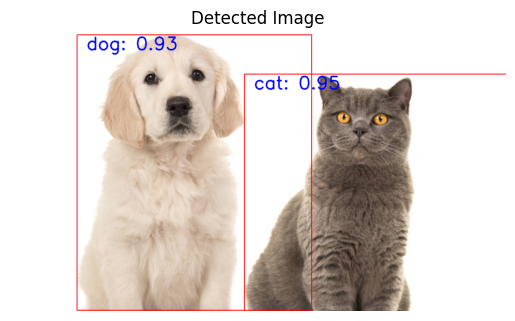

In [6]:
yolo = YOLO("yolov3u.pt") # yolov3s.pt, yolov3m.pt, yolov3l.pt, yolov3x.pt, yolov3u.pt, yolov5s.pt, yolov5m.pt, yolov5l.pt, yolov5x.pt, yolov5x6.pt, yolov5x.pt

results = yolo(img)
for result in results:
    boxes, classes, scores = result.boxes.xyxy, result.boxes.cls, result.boxes.conf #konum, sınıf, skor

for box, score, cl in zip(boxes, scores, classes):
    x,y,w,h = box
    print(int(cl))


    # np.floor= değerleri aşağıya yuvarlar
    top = max(0, int(np.floor(x + 0.5)))
    left = max(0, int(np.floor(y + 0.5)))
    right = max(0, int(np.floor(x + w + 0.5)))
    bottom = max(0, int(np.floor(y + h + 0.5)))

    cv2.rectangle(img, (top, left), (right, bottom), (255, 0, 0), 2)
    cv2.putText(img, f" {all_classes[int(cl)]}: {score:.2f}", (top, left +50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

display_image(img, "Detected Image")
